In [1]:
%pylab inline
import numpy as np
from sklearn.cross_validation import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load train and test data
mnist_train = np.loadtxt('../data/train.csv', delimiter=',', dtype=int, skiprows=1)
mnist_test = np.loadtxt('../data/test.csv', delimiter=',', dtype=int, skiprows=1)

In [3]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(mnist_train[:,1:], mnist_train[:,0])
X_train[0,:].shape

(784L,)

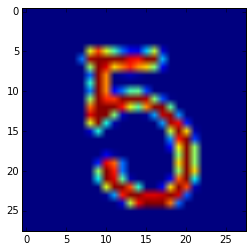

In [4]:
image = X_train[0,:].reshape(28, 28)
plt.imshow(image)

In [5]:
from skimage.transform import AffineTransform, warp, rotate

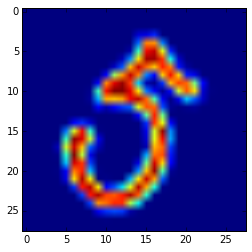

In [6]:
#tform = AffineTransform(scale=(1,1), rotation=np.pi/4, translation=(0,0))
#out = warp(image, tform)
out = rotate(image, -45, preserve_range=True)
plt.imshow(out)

In [7]:
max_rot = 45
num_rot = 64
angles = np.linspace(-max_rot, max_rot, num_rot)

In [8]:
X_rot = np.empty((0,784), int)
for angle in angles:
    X_rot = numpy.vstack([X_rot, rotate(image, angle, preserve_range=True).reshape(784)])

In [9]:
X_rot.shape

(64L, 784L)

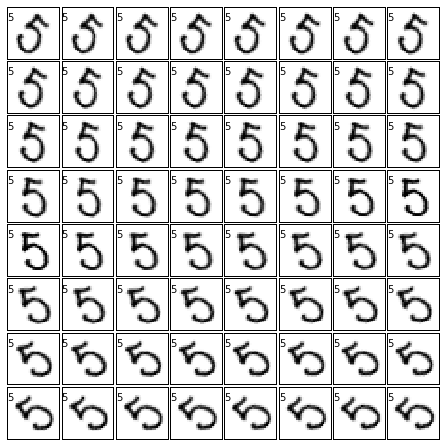

In [10]:
# copied from notebook 02A_representation_of_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_rot[i].reshape(28, 28), cmap=plt.cm.Greys, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y_train[0]))

In [24]:
from skimage.measure import EllipseModel
from skimage.draw import ellipse_perimeter

In [276]:
out = rotate(image, 60, preserve_range=True)
em = EllipseModel()
em.estimate(np.transpose(np.nonzero(out)))
[xc, yc, a, b, theta] = em.params
print xc, yc, a, b, theta

13.7288653085 15.277333252 4.22050465067 11.2575968985 -0.239305629337


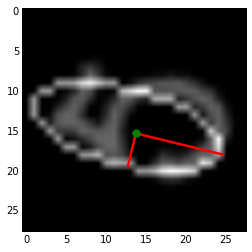

In [277]:
fig, ax = plt.subplots()
ax.imshow(out, cmap=plt.cm.gray)
x1 = xc + b*cos(-theta)
y1 = yc + b*sin(-theta)
x2 = xc - a*sin(-theta)
y2 = yc + a*cos(-theta)

ax.plot((xc, x1), (yc, y1), '-r', linewidth=2.5)
ax.plot((xc, x2), (yc, y2), '-r', linewidth=2.5)
ax.plot(xc, yc, '.g', markersize=15)

img = np.zeros((28, 28), dtype=np.uint8)
rr, cc = ellipse_perimeter(int(yc), int(xc), int(a), int(b), -theta, img.shape)
img[rr, cc] = 1
ax.imshow(img, cmap=plt.cm.gray,  alpha=0.6)

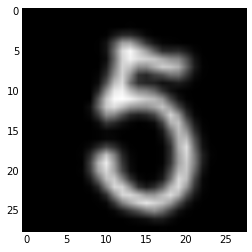

In [278]:
# move to center
tform = AffineTransform(translation=(xc - 14, yc - 14))
out_trans = warp(out, tform)

if(b > a):
    out_rot = rotate(out_trans, np.degrees(-theta) - 90, preserve_range=True)
else:
    out_rot = rotate(out_trans, np.degrees(-theta), preserve_range=True)

fig, ax = plt.subplots()
ax.imshow(out_rot, cmap=plt.cm.gray)

In [279]:
from fit_ellipse import *

In [280]:
data = np.transpose(np.nonzero(out))
x = data[:,0]
y = data[:,1]

In [281]:
a = fitEllipse(x,y)
center = ellipse_center(a)
phi = ellipse_angle_of_rotation(a)
axes = ellipse_axis_length(a)
print center, phi, axes

yc, xc = center
theta = phi
b, a = axes

[ 13.77346173  14.92785813] -0.227872718686 [ 5.46725805  8.97383567]


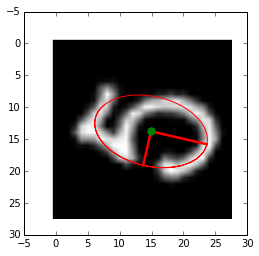

In [282]:
fig, ax = plt.subplots()
ax.imshow(out, cmap=plt.cm.gray)
x1 = xc + a*cos(-theta)
y1 = yc + a*sin(-theta)
x2 = xc - b*sin(-theta)
y2 = yc + b*cos(-theta)

ax.plot((xc, x1), (yc, y1), '-r', linewidth=2.5)
ax.plot((xc, x2), (yc, y2), '-r', linewidth=2.5)
ax.plot(xc, yc, '.g', markersize=15)

arc = pi
R = np.arange(0,arc*np.pi, 0.01)
b,a = axes
yc,xc = center
xx = xc + a*np.cos(R)*np.cos(-theta) - b*np.sin(R)*np.sin(-theta)
yy = yc + a*np.cos(R)*np.sin(-theta) + b*np.sin(R)*np.cos(-theta)
plot(xx,yy, color = 'red')

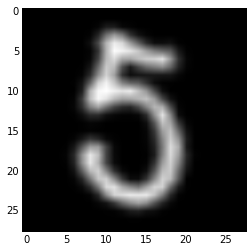

In [294]:
from skimage.transform import rescale

# move to center
tform = AffineTransform(translation=(xc - 14, yc - 14))
out_trans2 = warp(out, tform)

if(a > b):
    out_rot2 = rotate(out_trans2, np.degrees(-theta) - 90, preserve_range=True)
else:
    out_rot2 = rotate(out_trans2, np.degrees(-theta), preserve_range=True)

#out_scale2 = rescale(out_rot2, 0.5, preserve_range=True)

fig, ax = plt.subplots()
ax.imshow(out_rot2, cmap=plt.cm.gray)